In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno

from core.src.constants import GRAPHS_PATH, FINAL_CSV

In [2]:
sns.set(rc={"figure.figsize": (10, 10)})
df = pd.read_csv(FINAL_CSV)
plt.figure(figsize=(10, 8))

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Axes: >

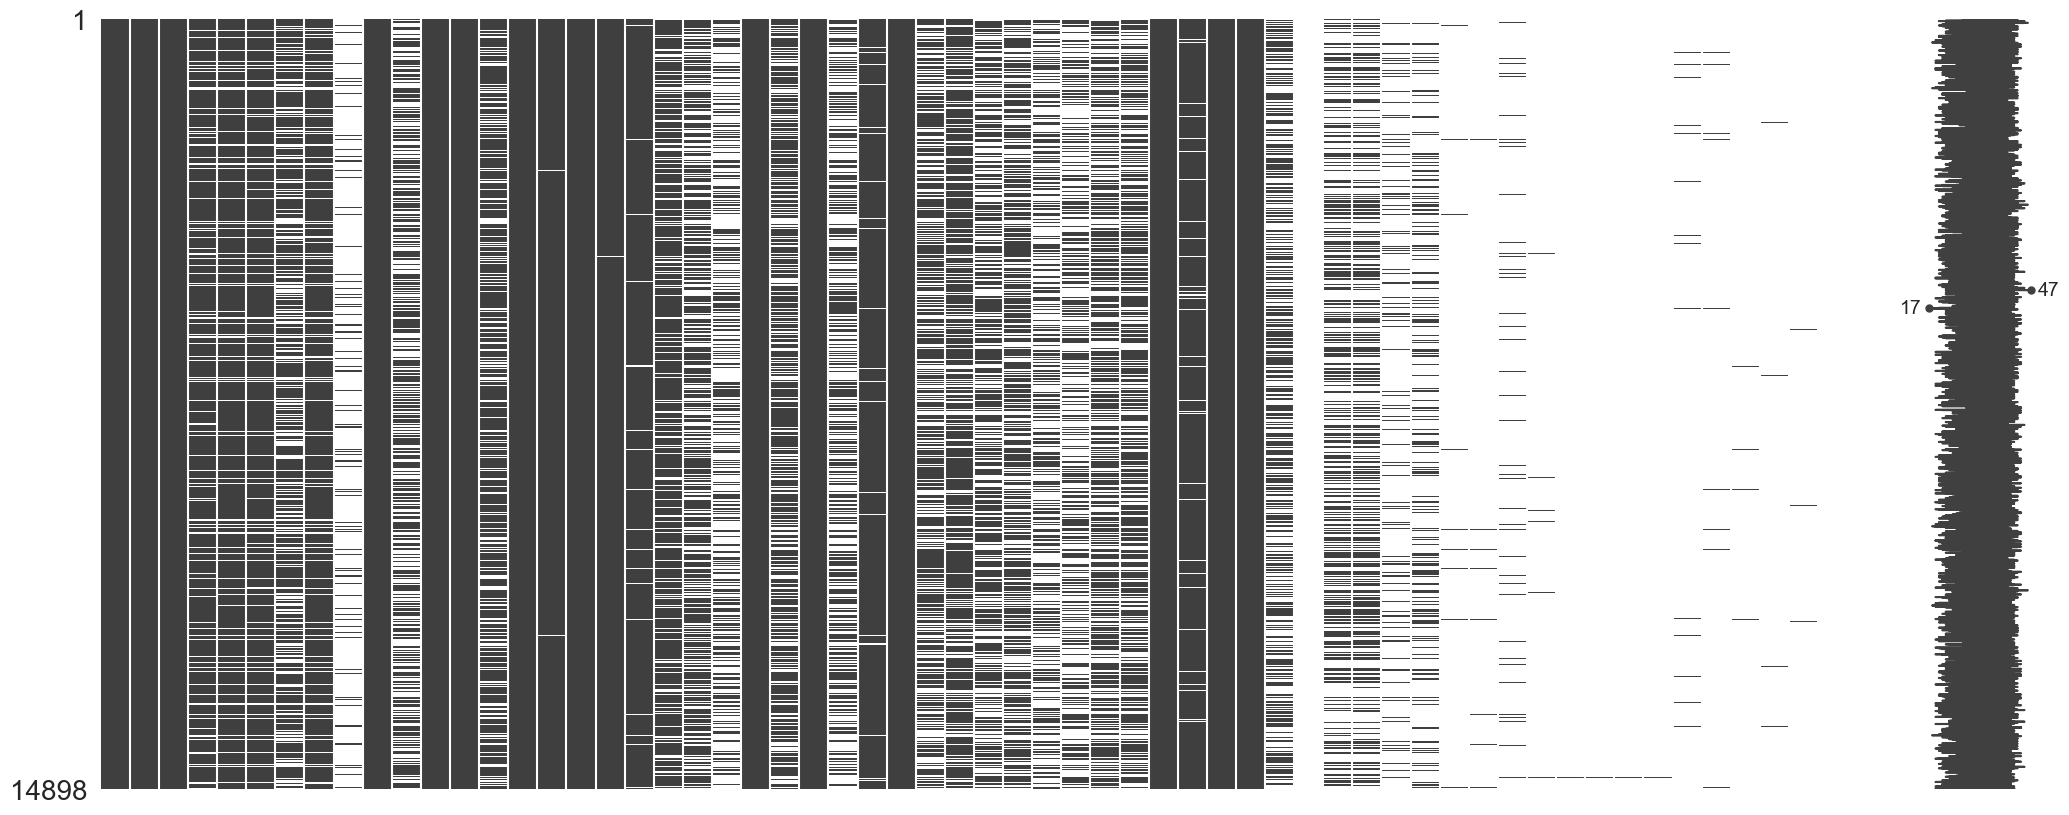

In [3]:
msno.matrix(df)

# Removing url and path columns

In [4]:
df = df.drop(["url", "path"], axis=1)

# Removing columns with more than 50% of missing values

{'consum extraurban', 'vehicule electrice', 'sau in limita a', 'valoare rata lunara', 'numar de rate lunare ramase', 'emisii co2', 'garantie de la producator pana la', 'contract baterie', 'garantie dealer (inclusa in pret)', 'consum mediu', 'valoare reziduala', 'eligibil pentru finantare', 'timp de incarcare', 'consum mixt', 'masina de epoca', 'primul proprietar (de nou)', 'capacitate baterie', 'autonomie', 'se emite factura', 'inmatriculat', 'volan pe dreapta', 'tuning', 'plata initiala (la predare)', 'predare leasing'}


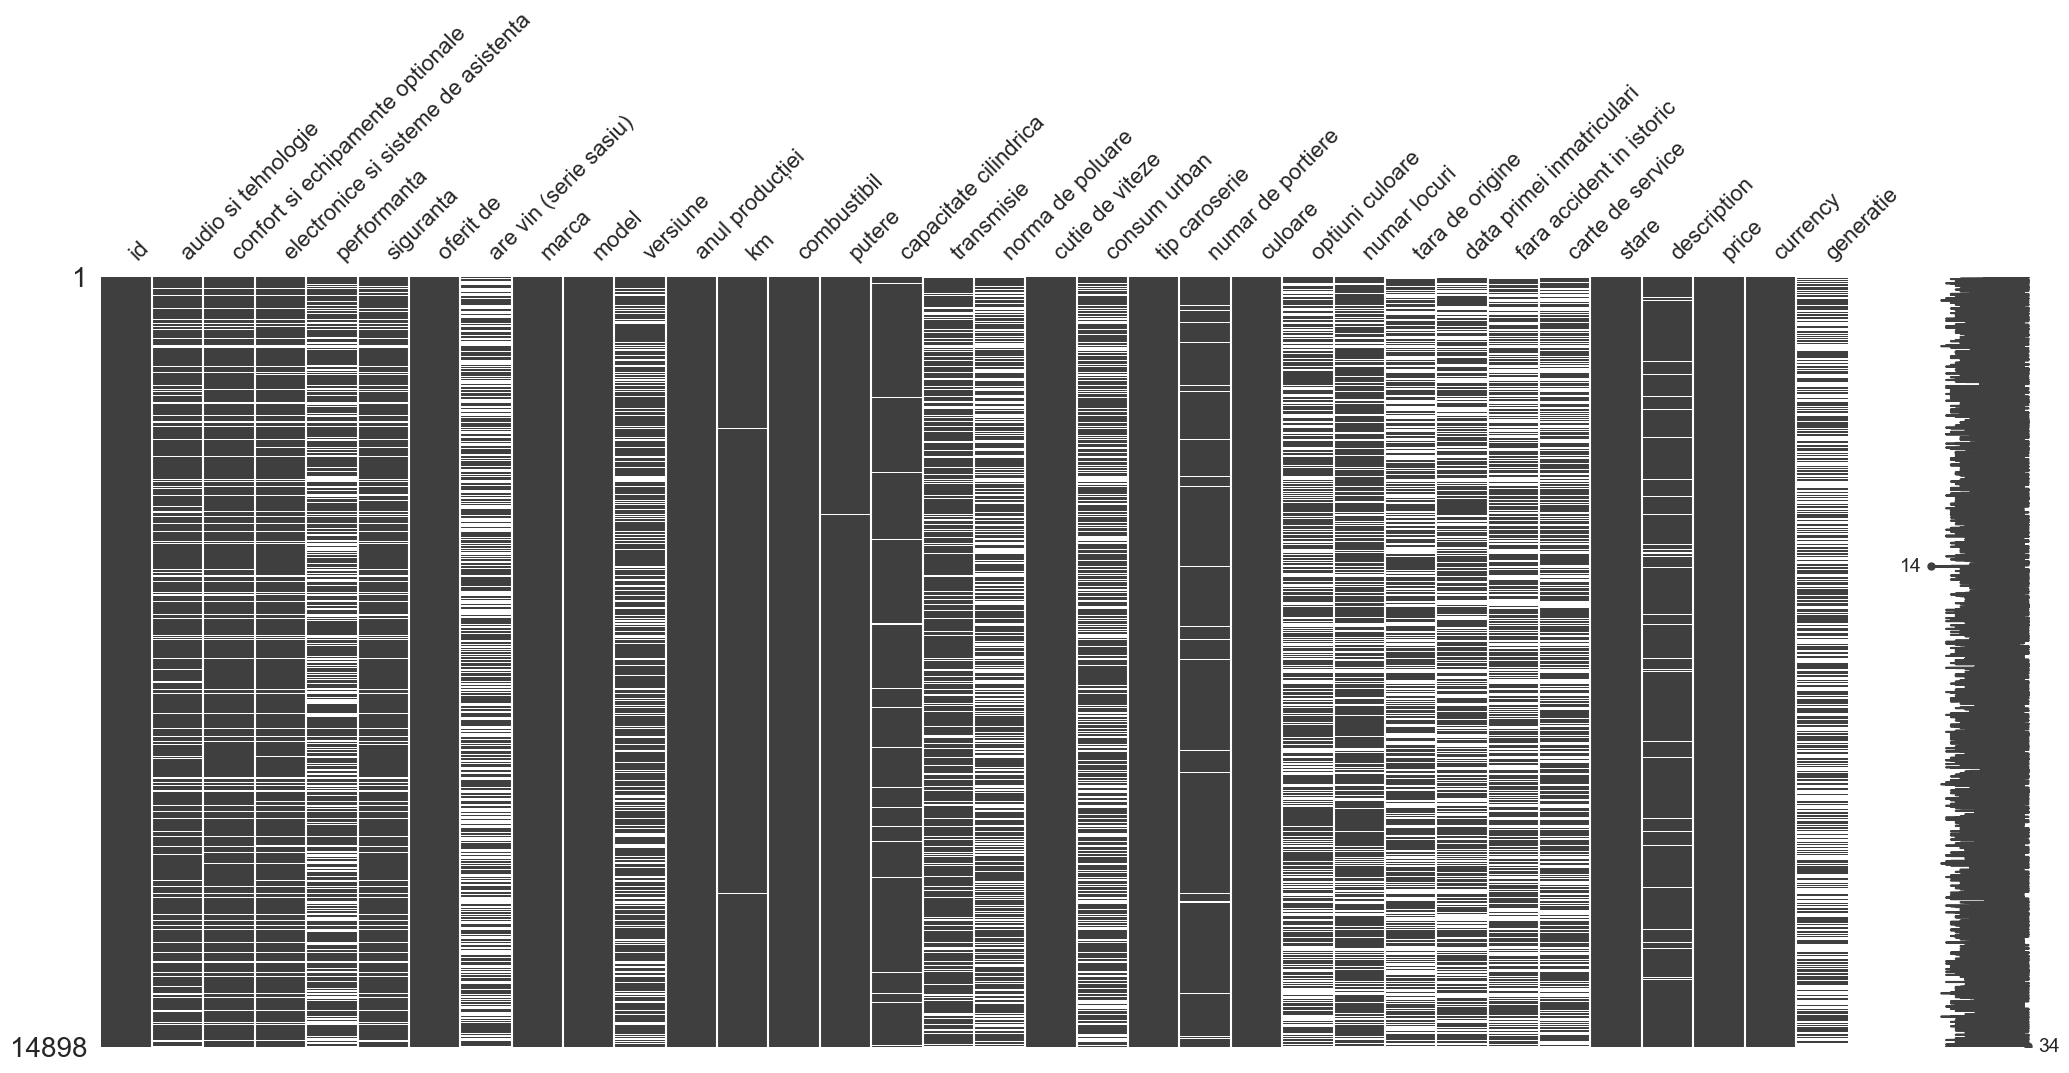

In [5]:



def remove_missing_values(df, threshold=0.5):
    missing_values = df.isnull().sum()
    missing_values = missing_values[missing_values > 0]
    missing_values = missing_values / df.shape[0]
    missing_values = missing_values[missing_values > threshold]
    df = df.drop(missing_values.index, axis=1)
    return df


initial_columns =df.columns
df = remove_missing_values(df)
msno.matrix(df)

removed_columns = set(initial_columns) - set(df.columns)
print(removed_columns)

# Plotting the remaining columns

<Axes: >

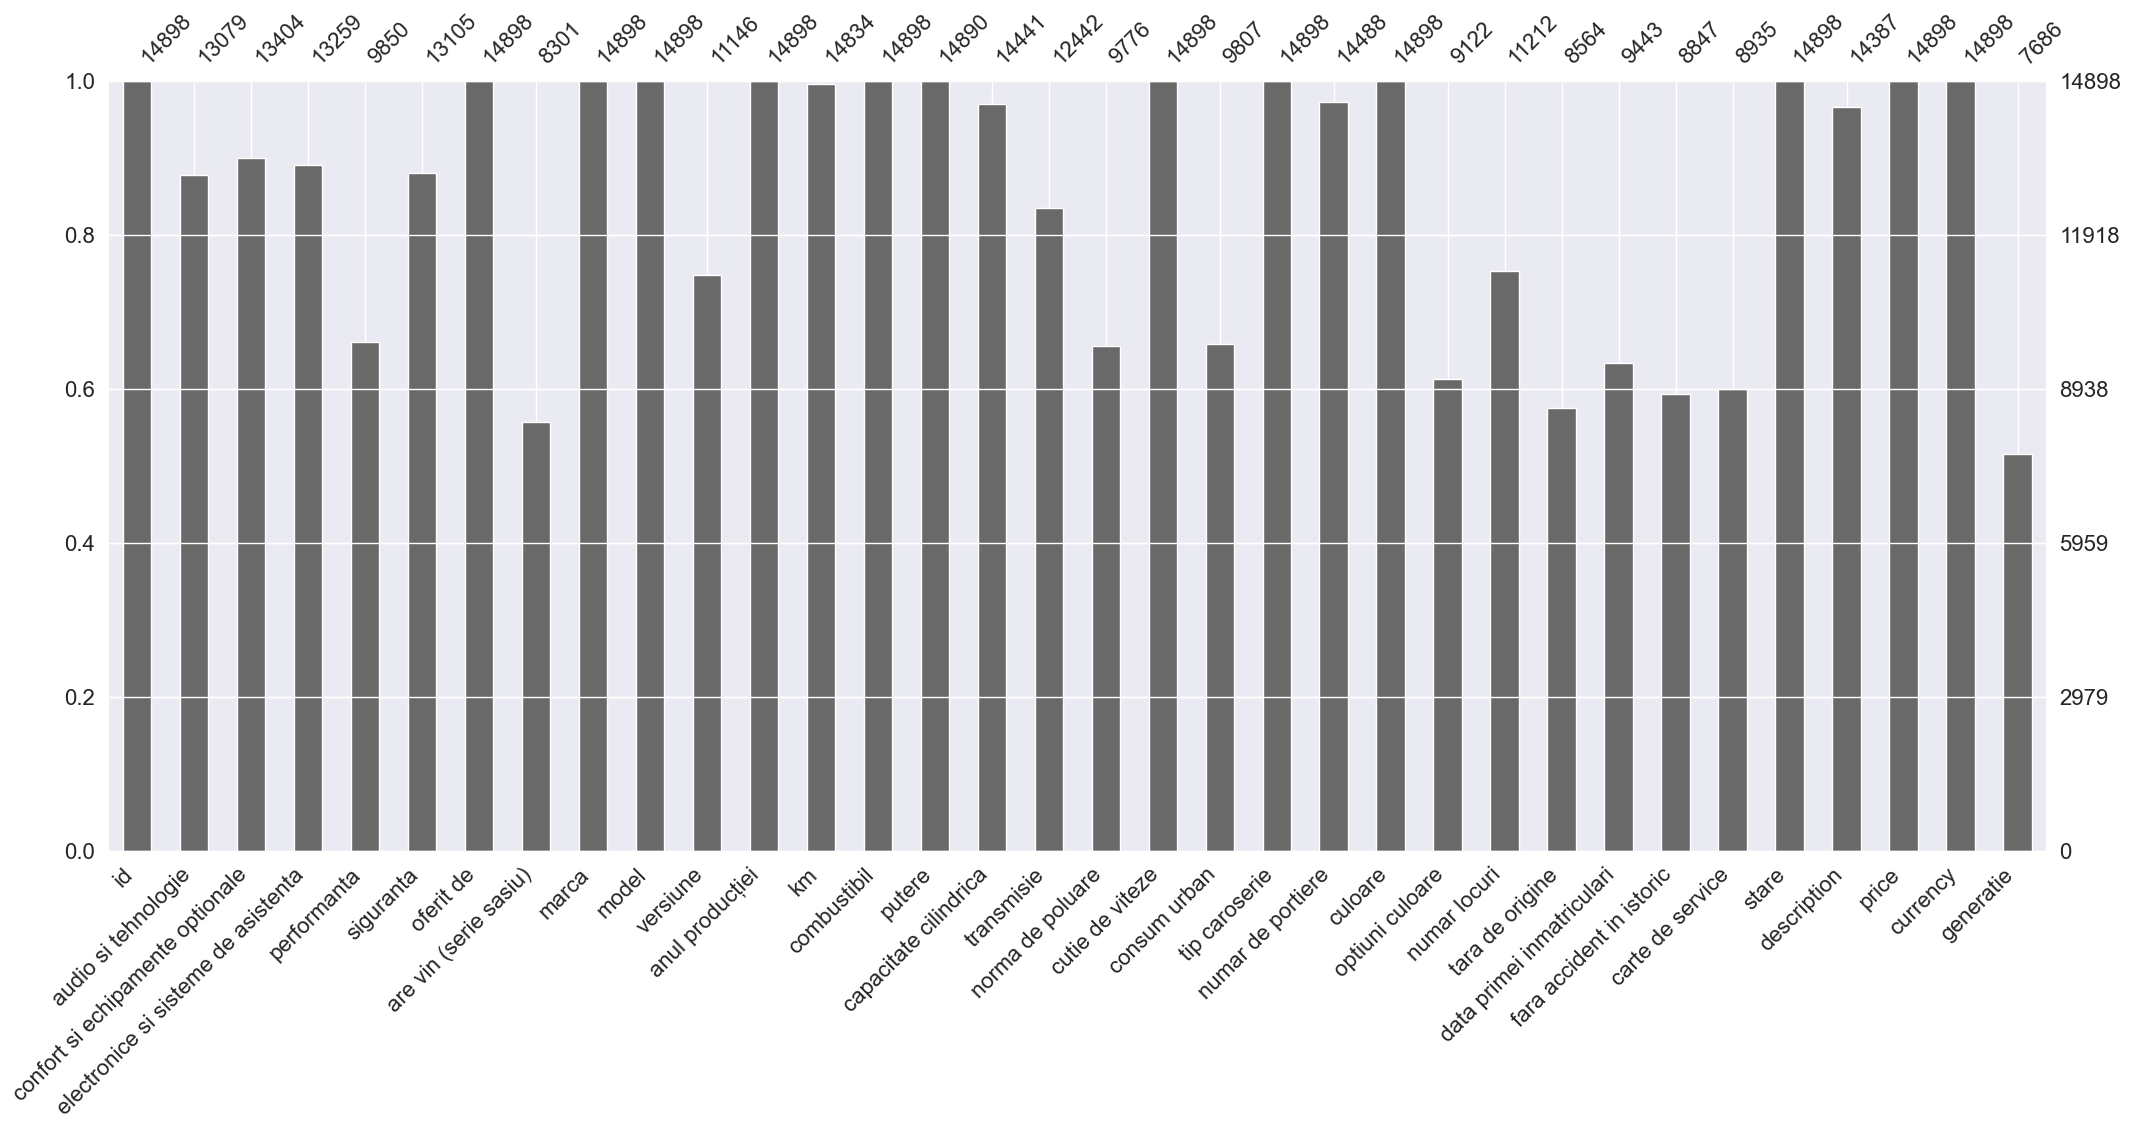

In [6]:
msno.bar(df)

# Remove rows which have currency different than eur and remove currency column

In [7]:
df = df[df["currency"] == "eur"]
df = df.drop("currency", axis=1)

<Axes: >

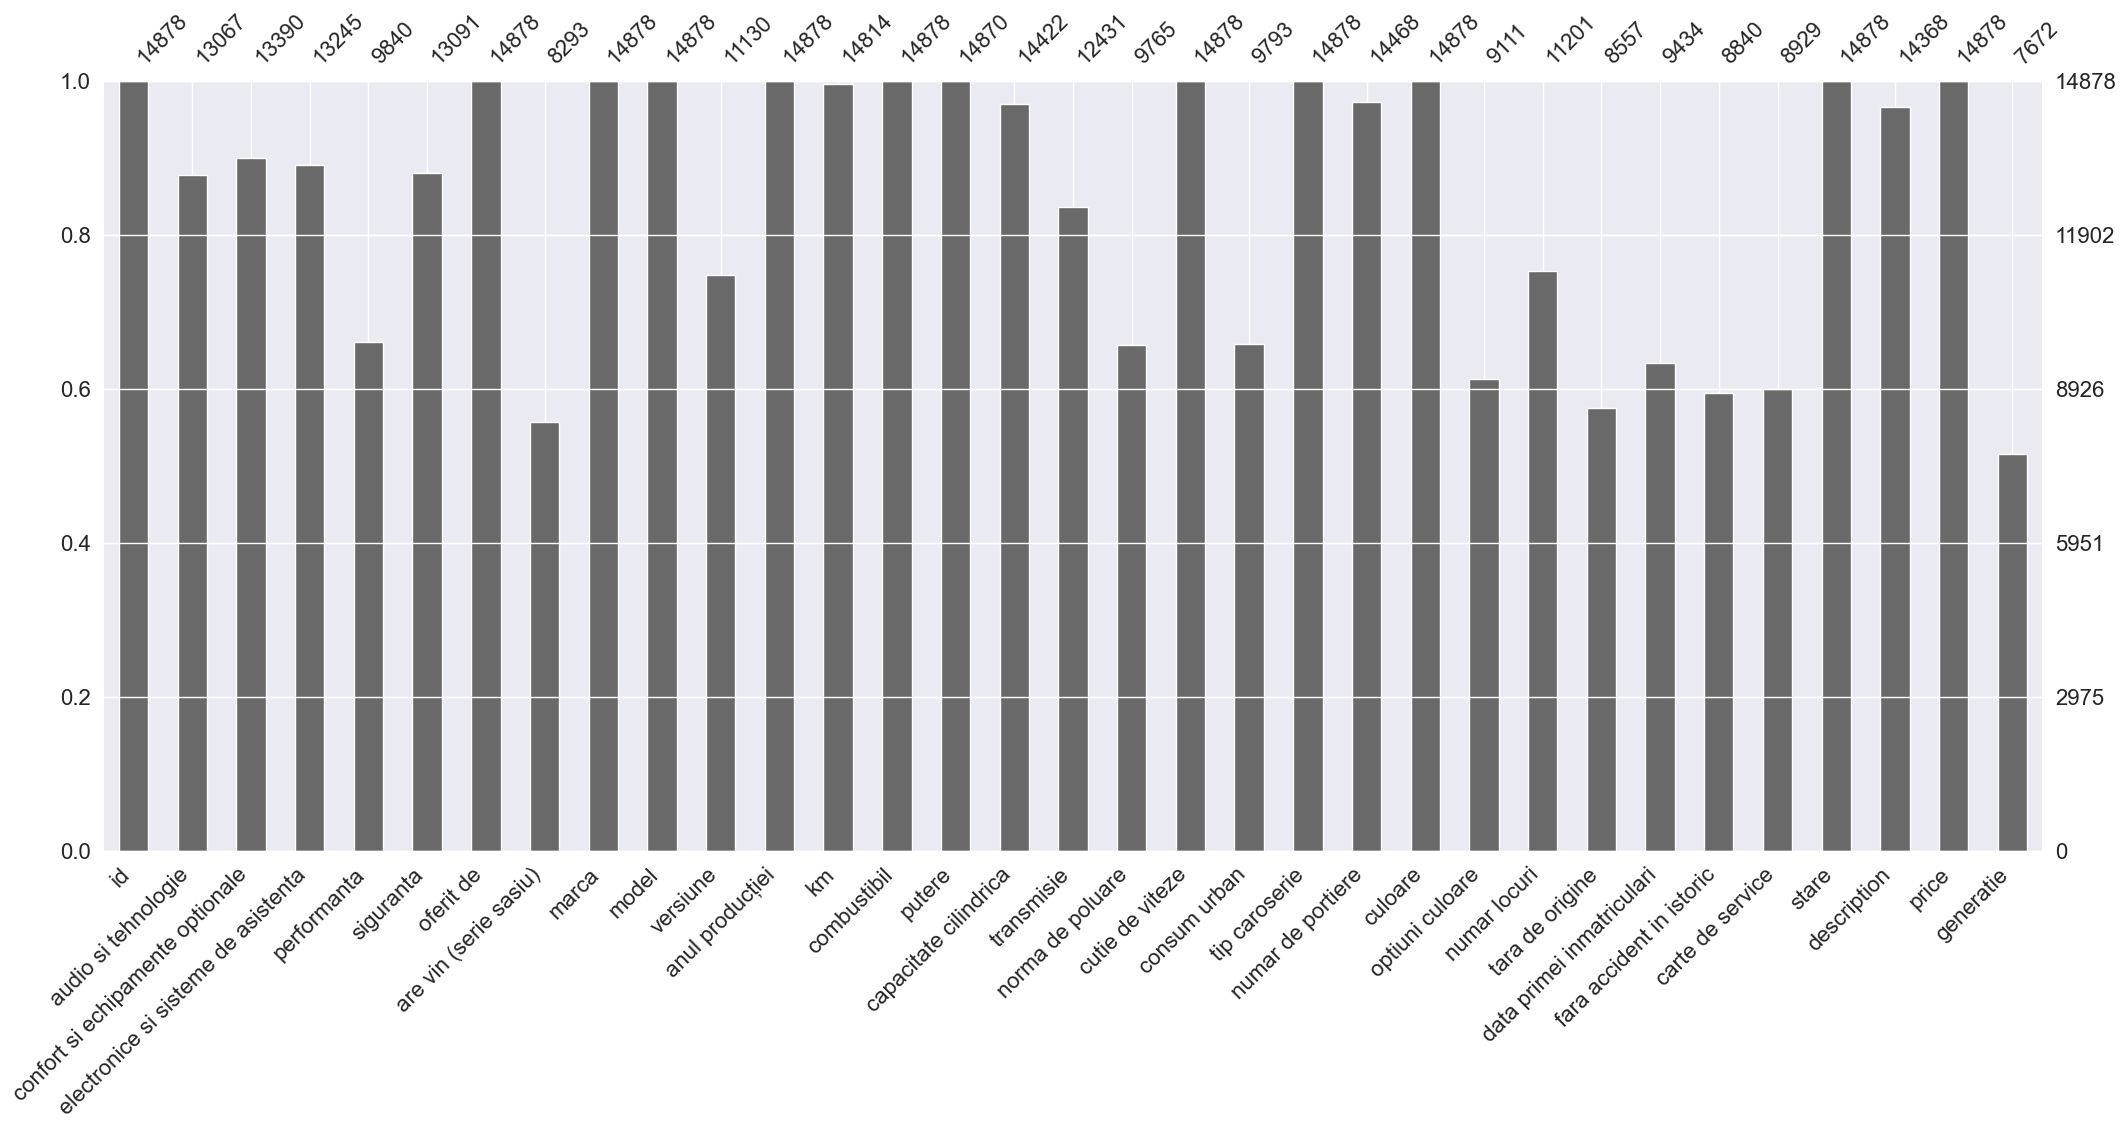

In [8]:
msno.bar(df)

# Print unique values of the remaining columns

In [9]:
def print_unique_values(df):
    for column in df.columns:
        if column not in ["id", "audio si tehnologie", "confort si echipamente optionale", "electronice si sisteme de asistenta",
                          "performanta", "siguranta", "anul producției", "marca", "model", "versiune", "km", "putere",
                          "capacitate cilindrica", "consum urban", "data primei inmatriculari", "description", "price",
                          "generatie"]:
            print(f"{column}: {df[column].unique()}")


print_unique_values(df)

oferit de: ['firma' 'privat']
are vin (serie sasiu): [nan 'da']
combustibil: ['diesel' 'benzina' 'hibrid' 'hibrid plug-in' 'electric' 'benzina + gpl'
 'benzina + cng']
transmisie: ['4x4 (automat)' nan 'spate' 'fata' '4x4 (manual)']
norma de poluare: ['euro 6' nan 'euro 4' 'euro 5' 'euro 6b' 'euro 6d' 'euro 6d-temp'
 'euro 6c' 'euro 3' 'euro 2' 'euro 5b' 'euro 5a' 'non-euro' 'euro 1']
cutie de viteze: ['automata' 'manuala']
tip caroserie: ['suv' 'masina mica' 'sedan' 'combi' 'compacta' 'monovolum' 'cabrio'
 'masina de oras' 'coupe']
numar de portiere: [nan  5.  2.  4.  3.  6.]
culoare: ['alte culori' 'negru' 'rosu' 'verde' 'albastru' 'alb' 'argint' 'gri'
 'galben/auriu' 'maro' 'bej' 'portocaliu']
optiuni culoare: [nan 'metalizata' 'mat' 'perlat']
numar locuri: [nan  5.  2.  4.  3.  9.  7.  6.  1.  8.]
tara de origine: ['germania' 'romania' nan 'italia' 'austria' 'suedia' 'franta' 'olanda'
 'slovacia' 'belgia' 'coreea de sud' 'spania' 'statele unite ale americii'
 'japonia' 'regatul unit

oferit de: oferit de
firma     8974
privat    5904
Name: count, dtype: int64


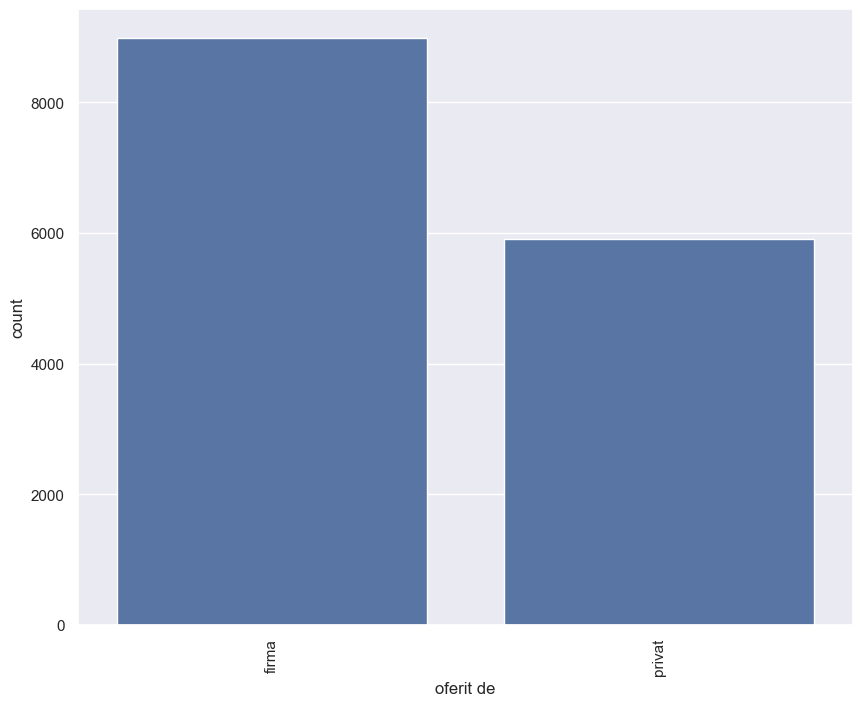

are vin (serie sasiu): are vin (serie sasiu)
da     8293
NaN    6585
Name: count, dtype: int64


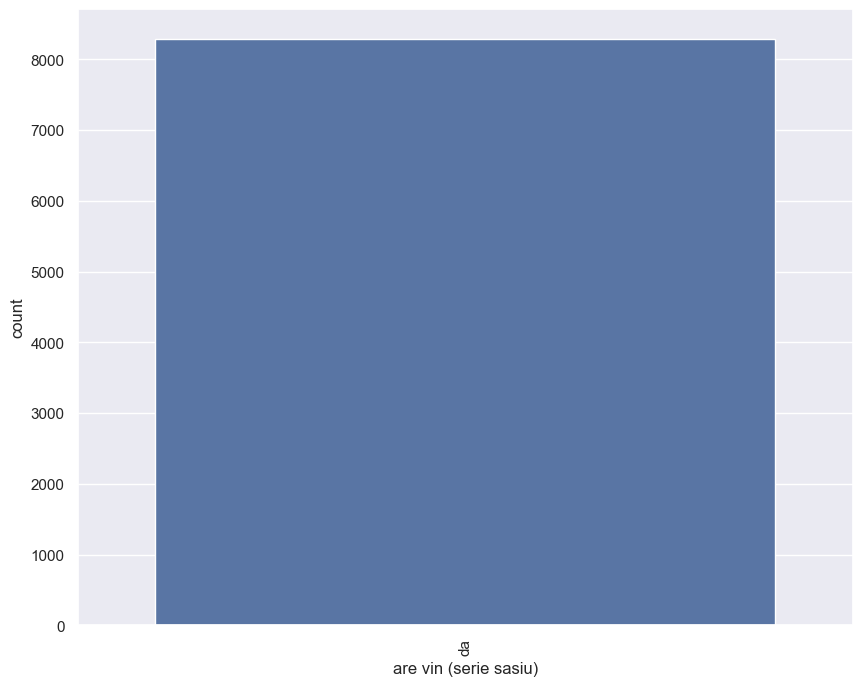

combustibil: combustibil
diesel            9175
benzina           3989
hibrid             824
electric           452
hibrid plug-in     316
benzina + gpl      115
benzina + cng        7
Name: count, dtype: int64


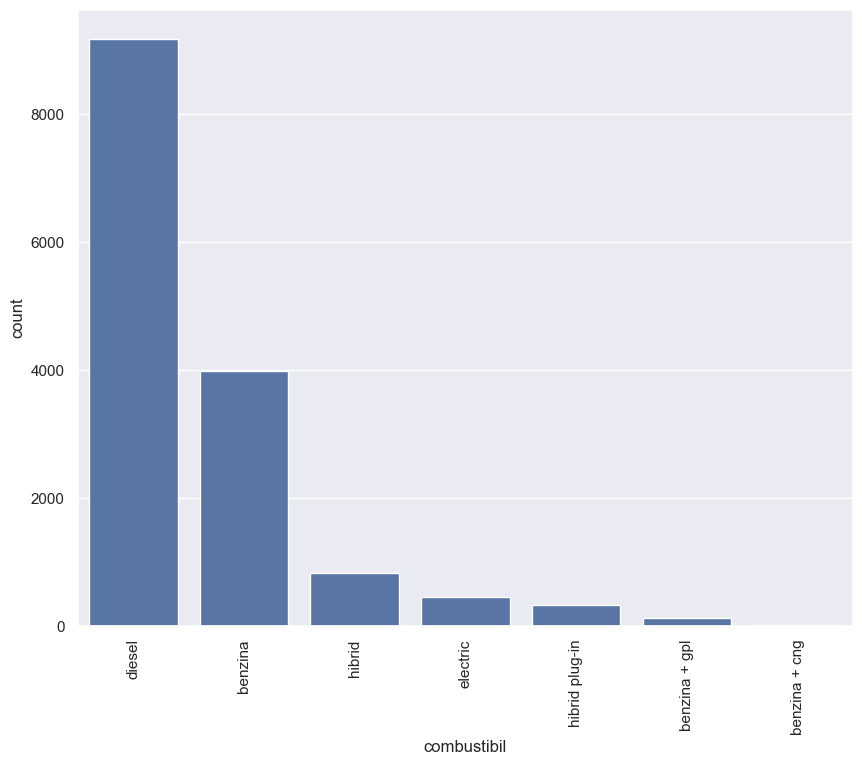

transmisie: transmisie
fata             6161
4x4 (automat)    4541
NaN              2447
spate            1020
4x4 (manual)      709
Name: count, dtype: int64


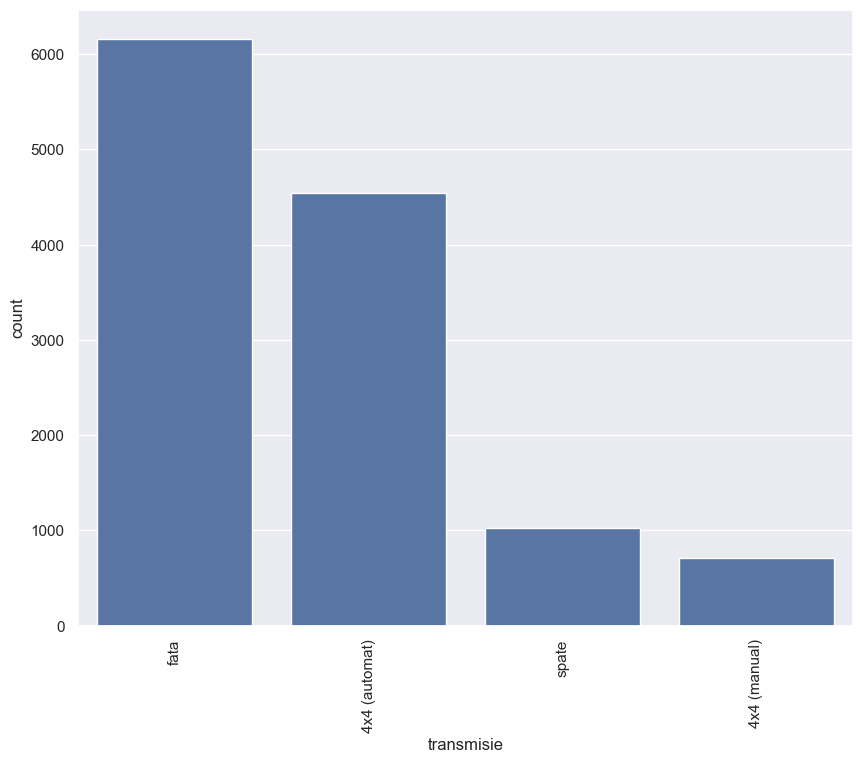

norma de poluare: norma de poluare
euro 6          6233
NaN             5113
euro 5          1967
euro 4           517
euro 6d          378
euro 6d-temp     279
euro 6b          203
euro 5b           52
euro 6c           47
euro 5a           36
euro 3            28
euro 2            12
non-euro          12
euro 1             1
Name: count, dtype: int64


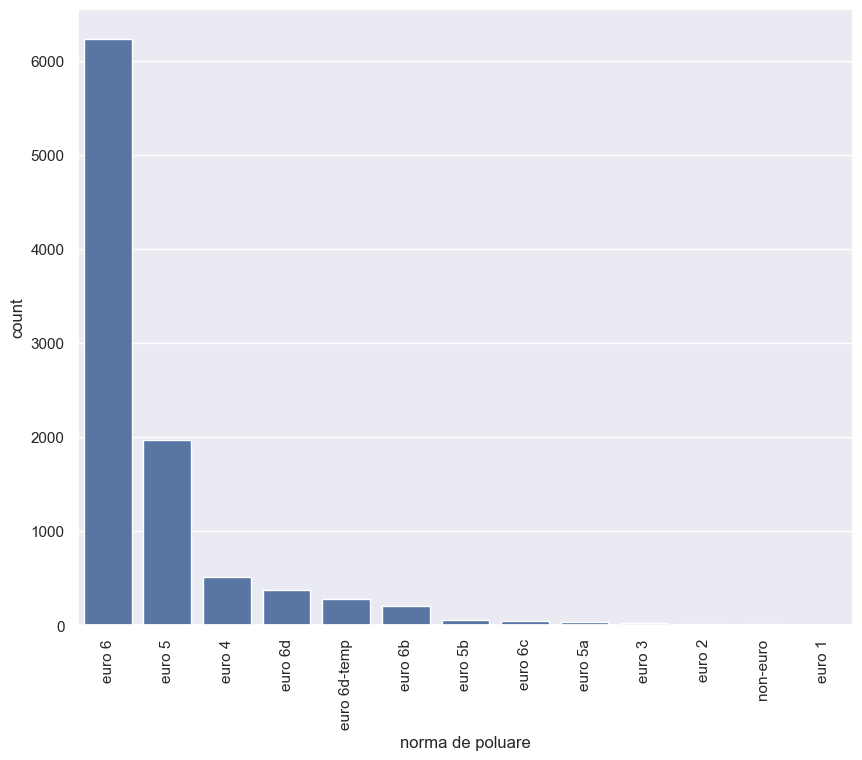

cutie de viteze: cutie de viteze
automata    9488
manuala     5390
Name: count, dtype: int64


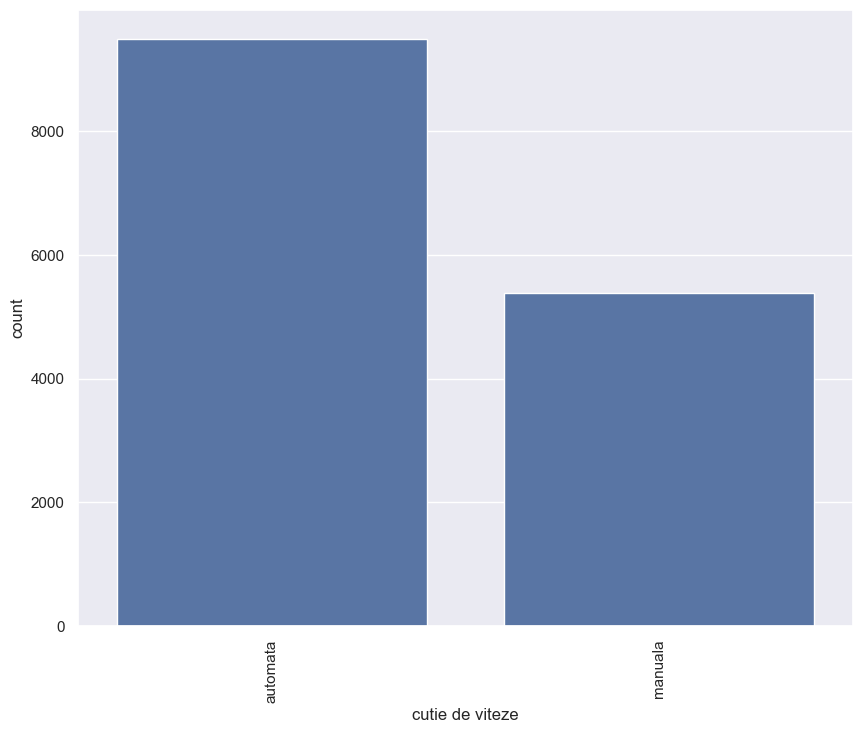

tip caroserie: tip caroserie
suv               5865
sedan             3374
combi             1868
compacta          1386
monovolum          867
masina de oras     728
coupe              433
masina mica        223
cabrio             134
Name: count, dtype: int64


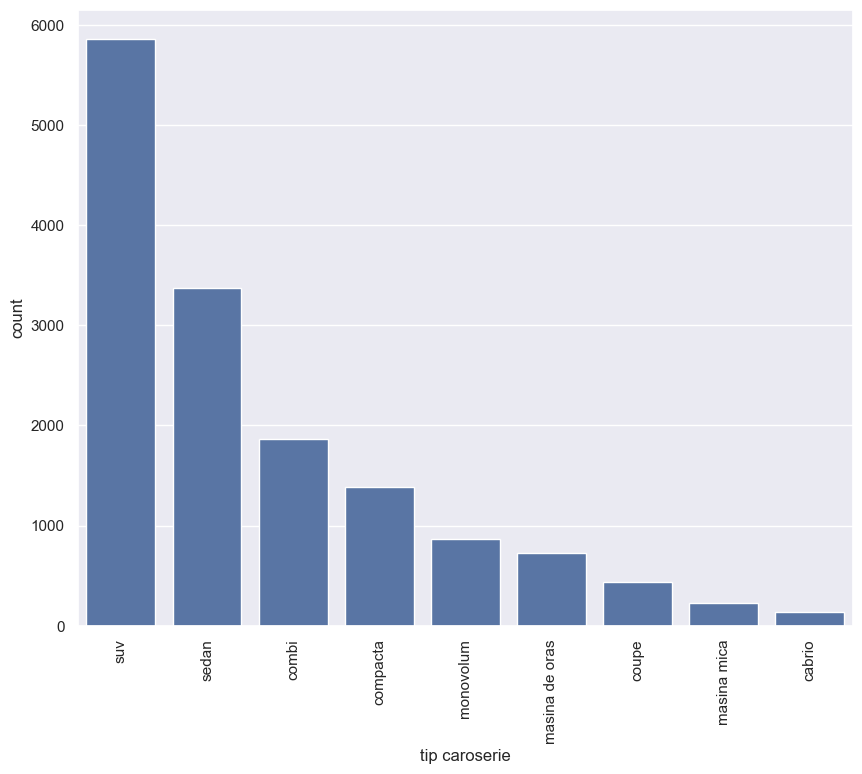

numar de portiere: numar de portiere
5.0    11117
4.0     2693
NaN      410
2.0      410
3.0      239
6.0        9
Name: count, dtype: int64


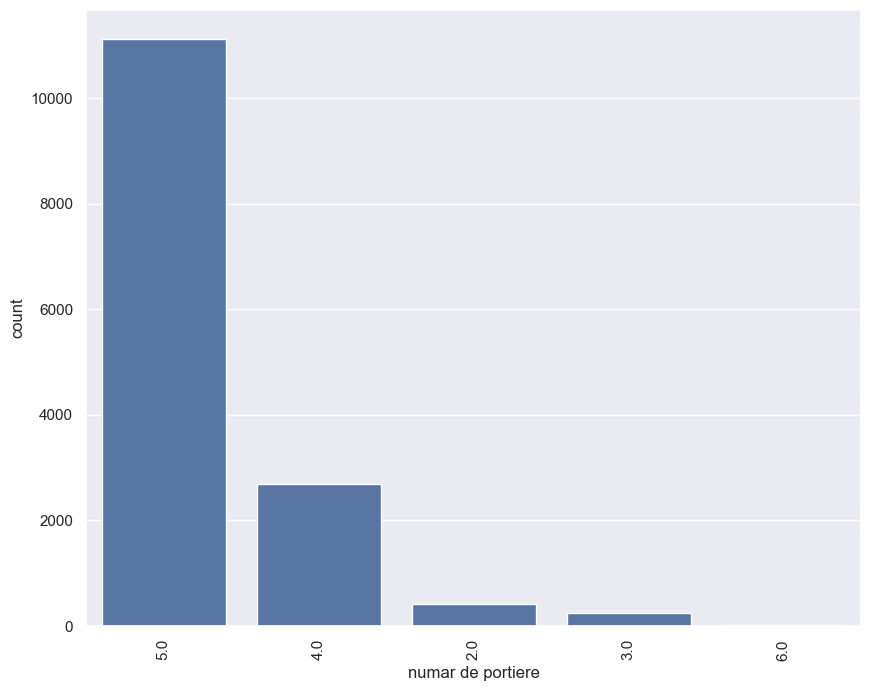

culoare: culoare
negru           3795
gri             3636
alb             2786
albastru        1851
rosu             672
argint           600
alte culori      519
maro             493
verde            197
galben/auriu     139
bej              112
portocaliu        78
Name: count, dtype: int64


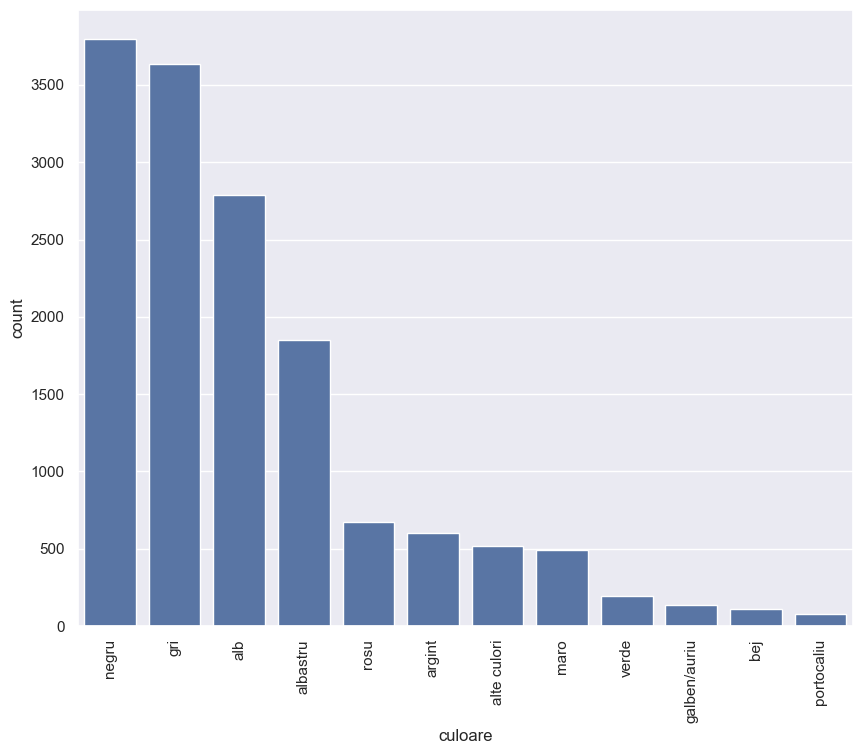

optiuni culoare: optiuni culoare
metalizata    7835
NaN           5767
perlat         911
mat            365
Name: count, dtype: int64


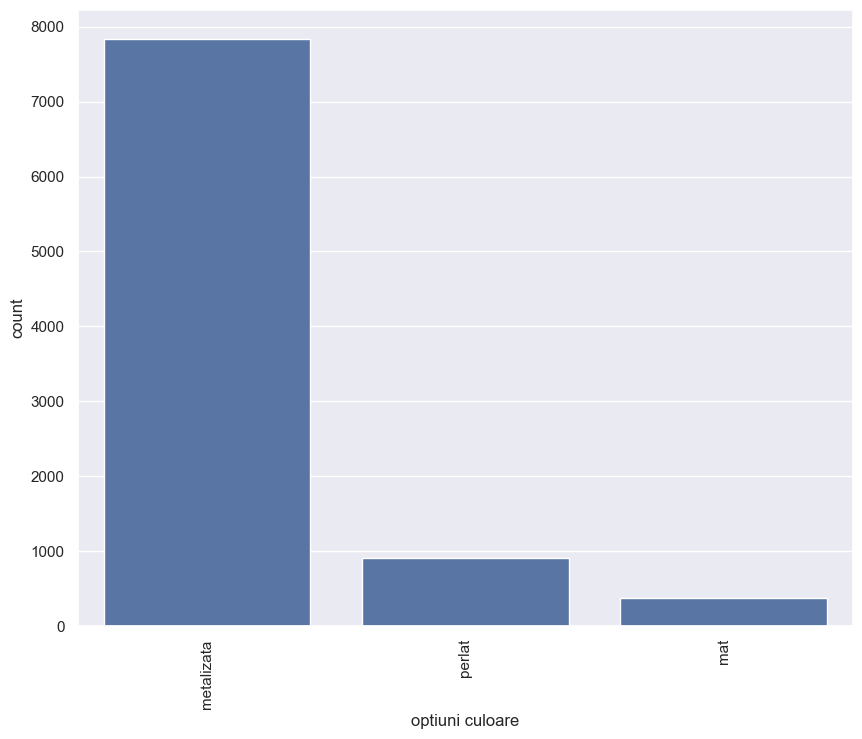

numar locuri: numar locuri
5.0    9916
NaN    3677
4.0     536
7.0     405
2.0     139
3.0      68
9.0      62
6.0      39
8.0      31
1.0       5
Name: count, dtype: int64


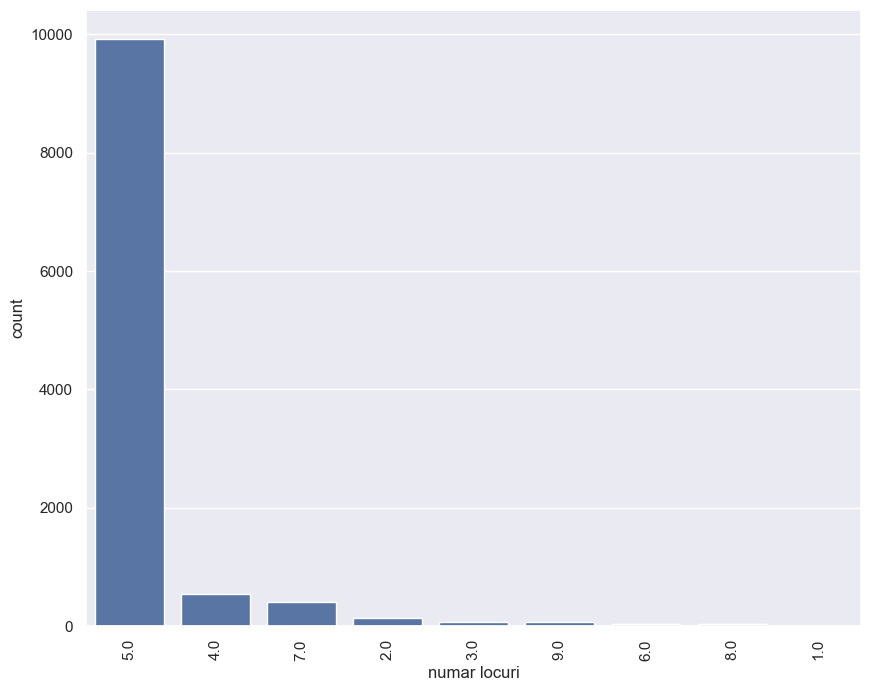

In [10]:
def plot_distribution_on_categorised_columns(df):
    columns = ["oferit de", "are vin (serie sasiu)", "combustibil", "transmisie", "norma de poluare", "cutie de viteze",
               "tip caroserie", "numar de portiere", "culoare", "optiuni culoare", "numar locuri"]

    # also count the null values
    for column in columns:
        print(f"{column}: {df[column].value_counts(dropna=False)}")
        plt.figure(figsize=(10, 8))
        sns.countplot(x=column, data=df, order=df[column].value_counts().index)
        plt.xticks(rotation=90)
        plt.savefig(f"{GRAPHS_PATH}/{column}.png")
        plt.show()


plot_distribution_on_categorised_columns(df)

In [11]:
def save_df_to_csv(df, path):
    df.to_csv(path, index=False)


save_df_to_csv(df, 'trying.csv')

# Format "norma de poluare" column

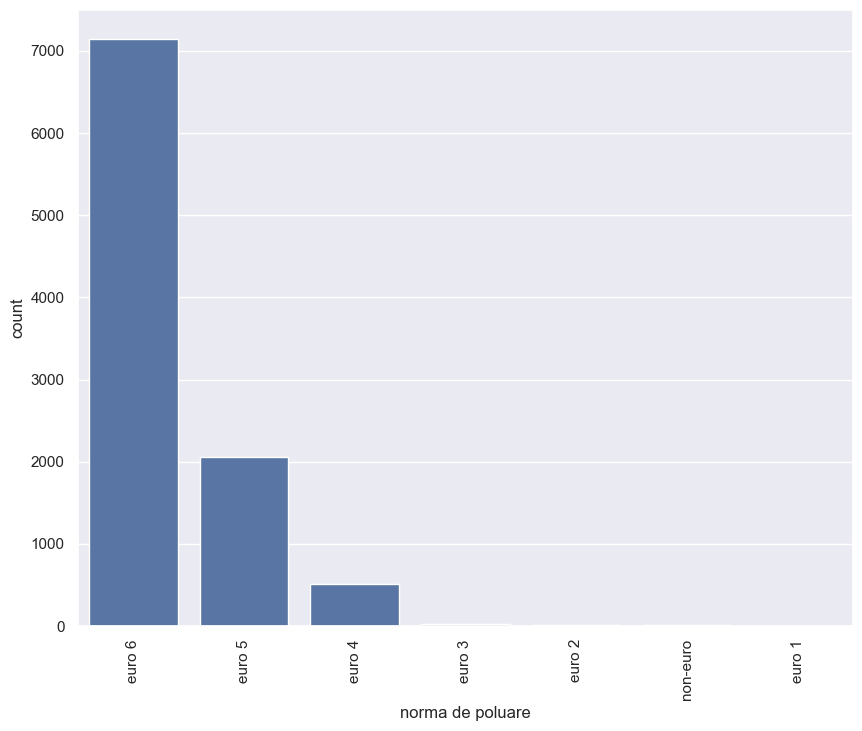

In [12]:
# replace all values that start with 'euro 6' with 'euro 6'
df["norma de poluare"] = df["norma de poluare"].str.replace(r"euro 6.*", "euro 6", regex=True)
df["norma de poluare"] = df["norma de poluare"].str.replace(r"euro 5.*", "euro 5", regex=True)

# plot the distribution
plt.figure(figsize=(10, 8))
sns.countplot(x="norma de poluare", data=df, order=df["norma de poluare"].value_counts().index)
plt.xticks(rotation=90)
plt.show()

In [13]:
# Drop rows with not price set

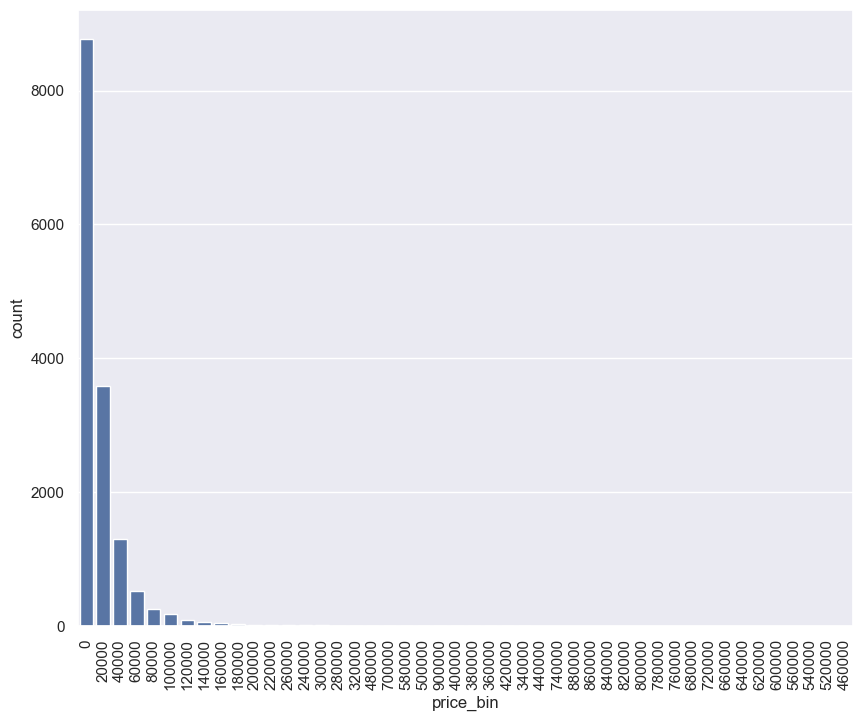

In [14]:
df = df.dropna(subset=["price"])

# make price an integer
# delete everything after "," and "."

df["price"] = df["price"].str.replace(r",.*", "", regex=True)
df["price"] = df["price"].str.replace(r"\..*", "", regex=True)
# 
# df["price"] = df["price"].astype(int)

# print price distribution in bins of 20k


df["price"] = df["price"].astype(int)

df["price_bin"] = pd.cut(df["price"], bins=np.arange(0, df["price"].max() + 20000, 20000),
                         labels=np.arange(0, df["price"].max(), 20000))

plt.figure(figsize=(10, 8))
sns.countplot(x="price_bin", data=df, order=df["price_bin"].value_counts().index)
plt.xticks(rotation=90)
plt.show()

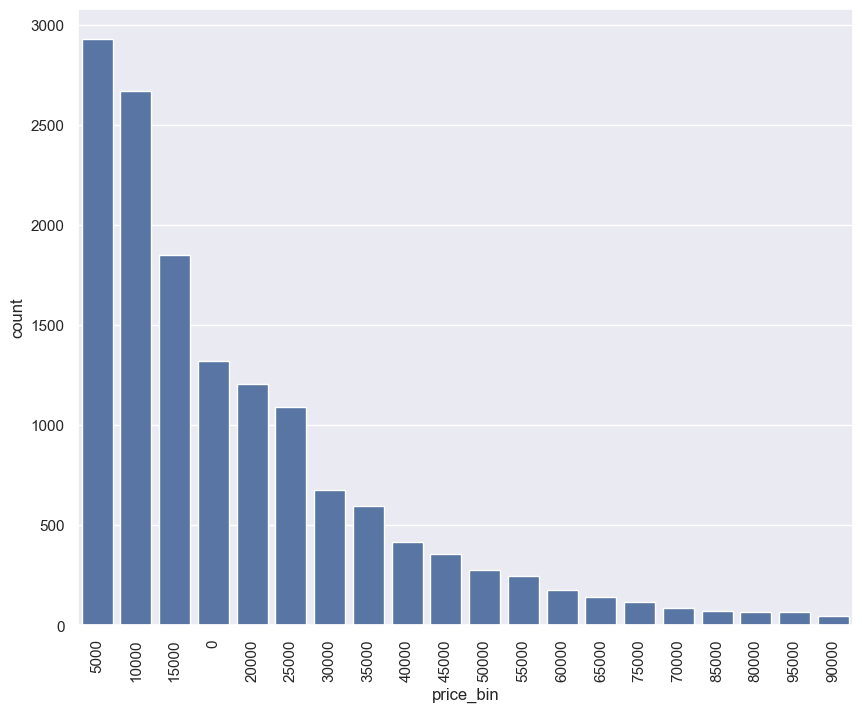

In [15]:
# remove outliers that are above 100k
df = df[df["price"] <= 100000]

# plot the distribution again but with 5k bins
df["price_bin"] = pd.cut(df["price"], bins=np.arange(0, df["price"].max() + 5000, 5000),
                         labels=np.arange(0, df["price"].max(), 5000))

plt.figure(figsize=(10, 8))
sns.countplot(x="price_bin", data=df, order=df["price_bin"].value_counts().index)
plt.xticks(rotation=90)
plt.show()

# Price based on all the other columns

100000


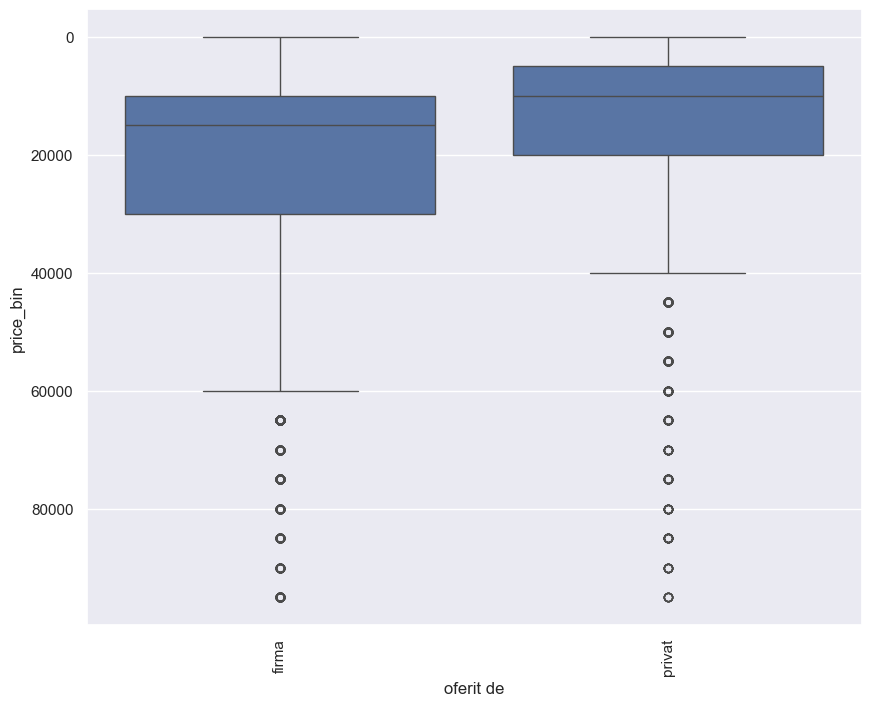

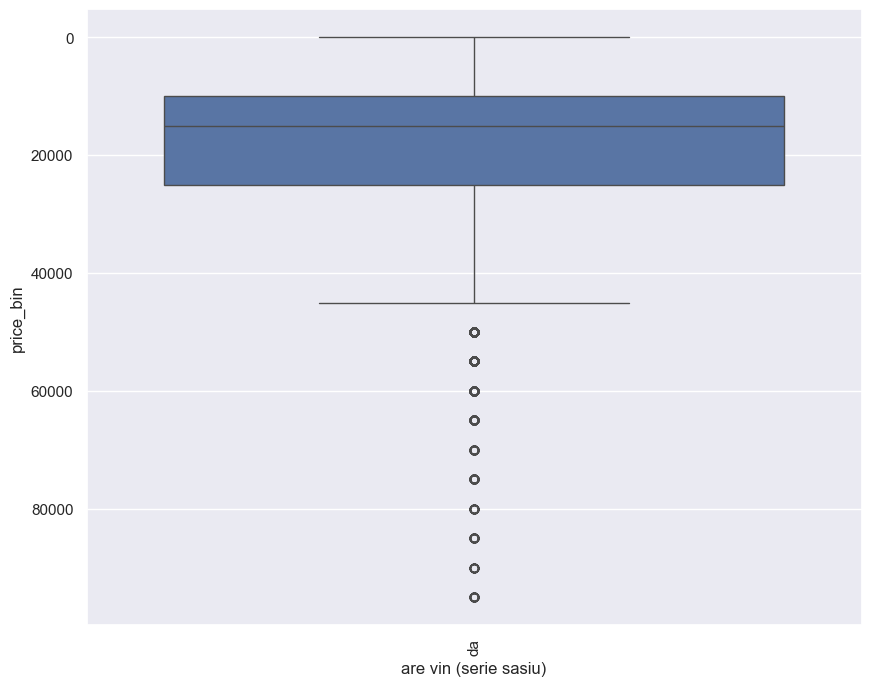

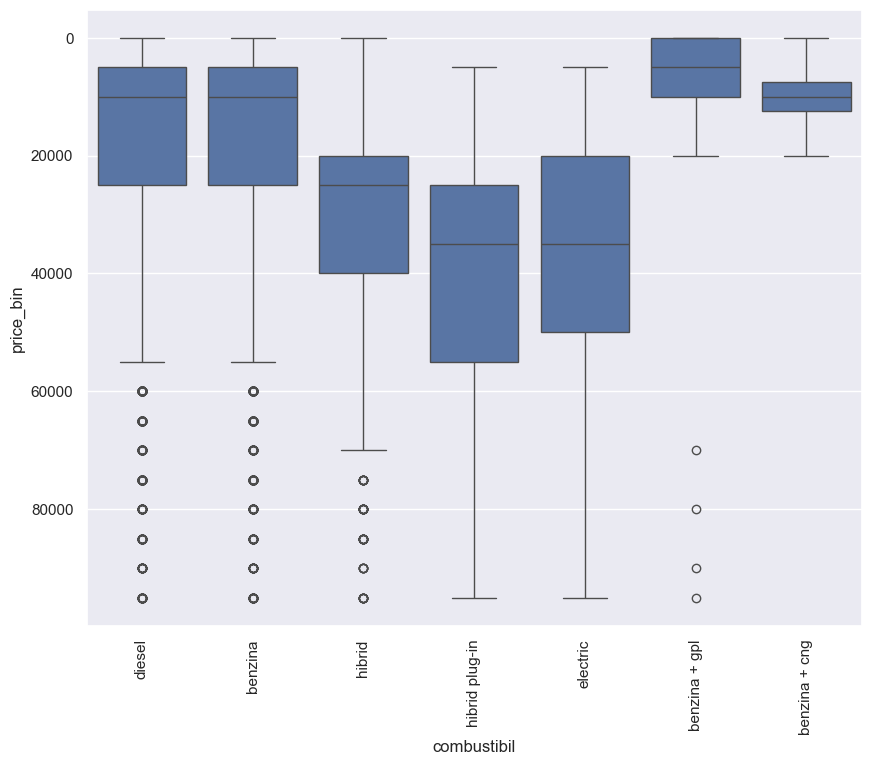

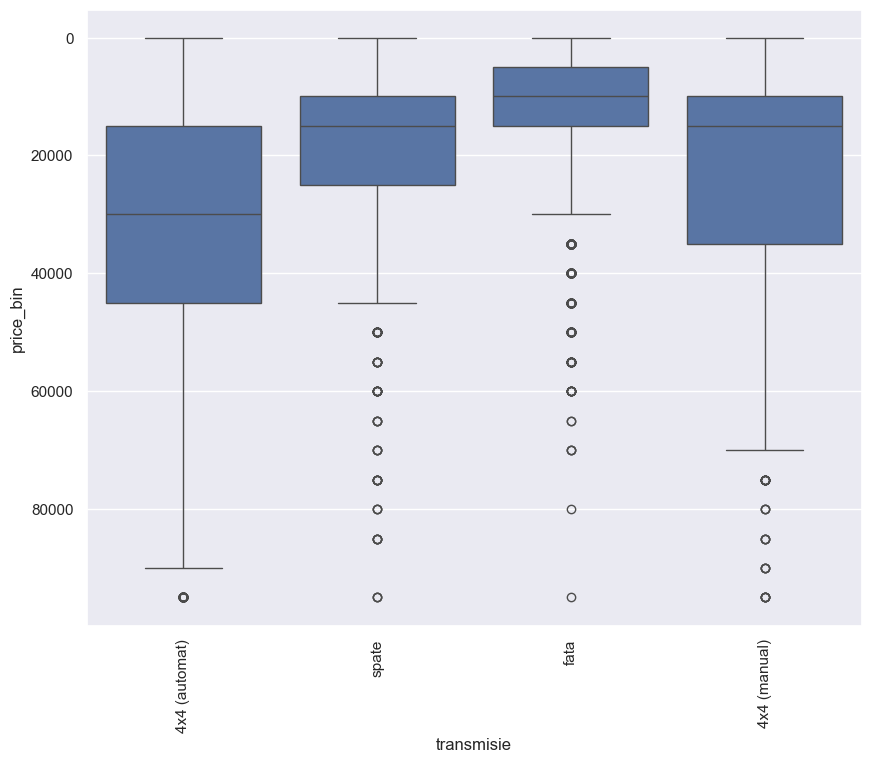

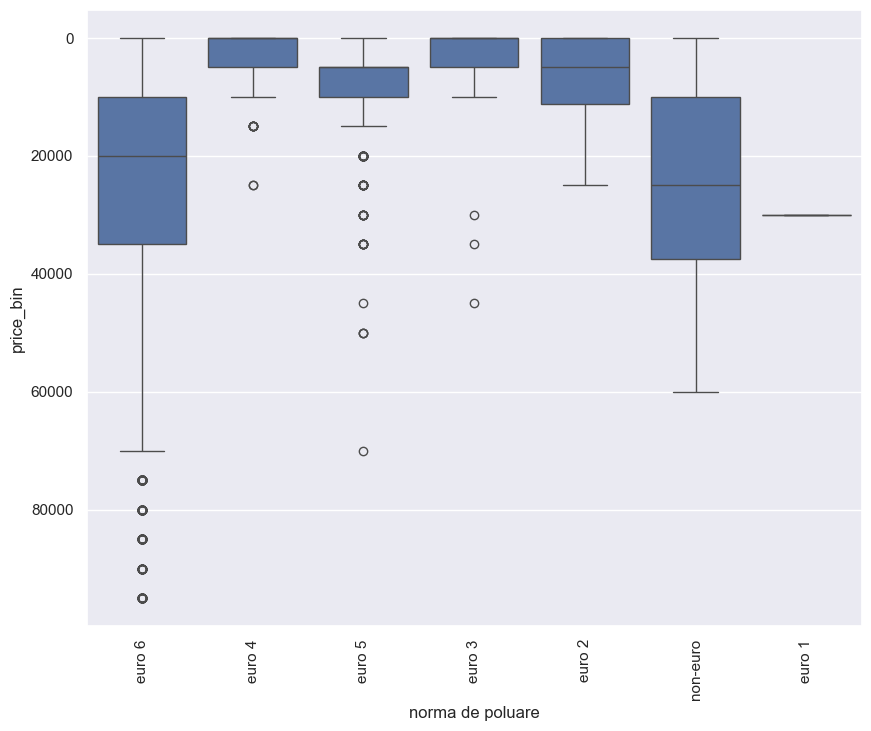

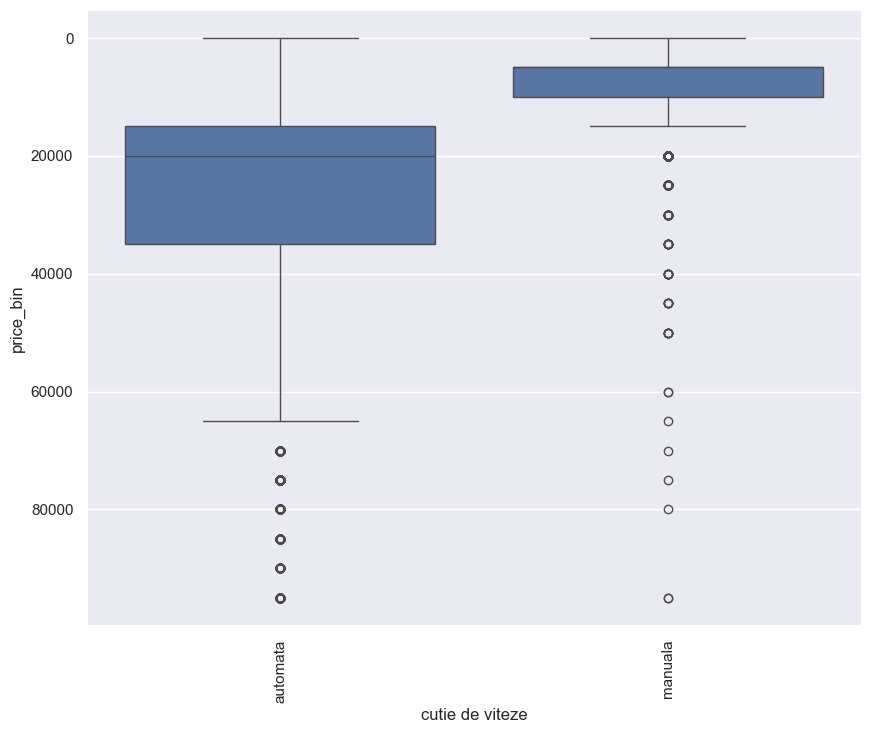

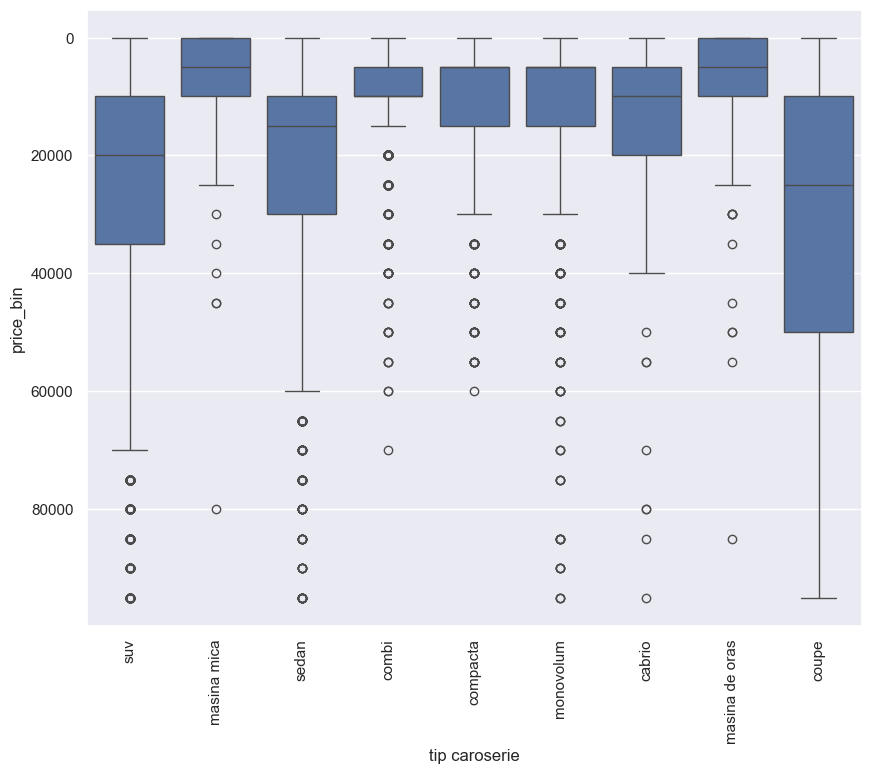

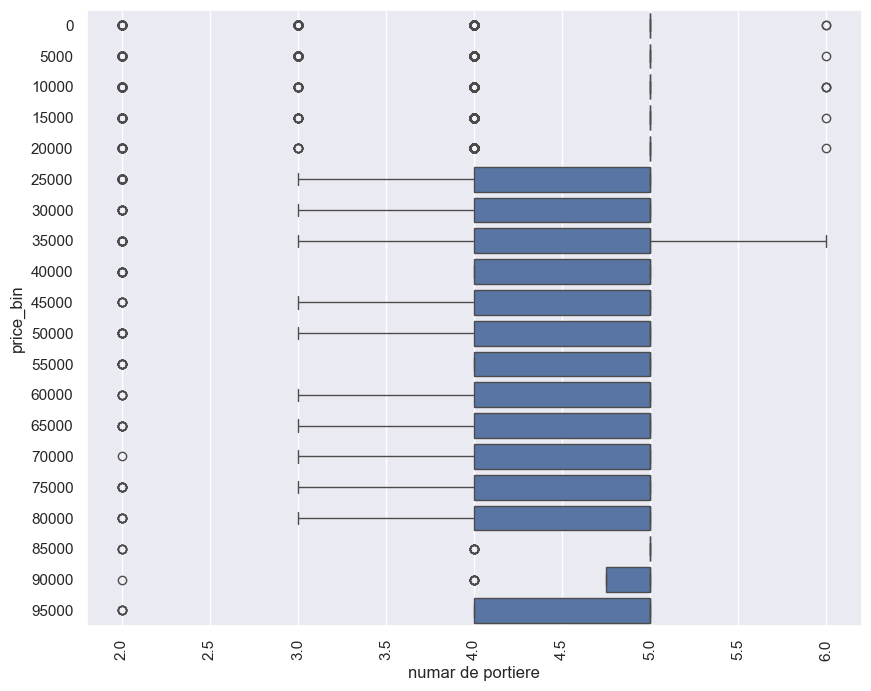

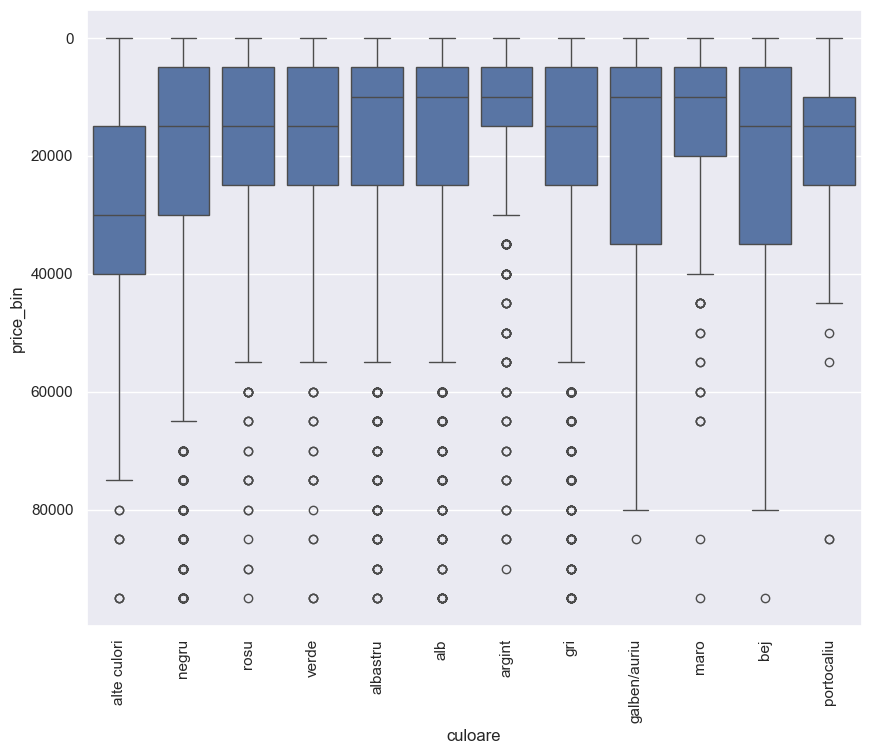

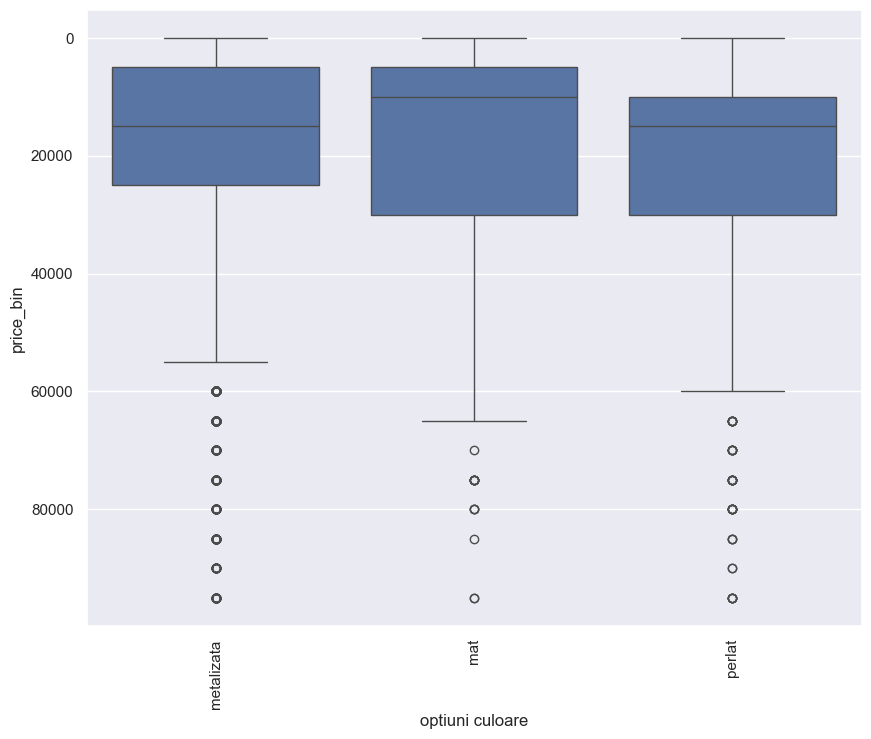

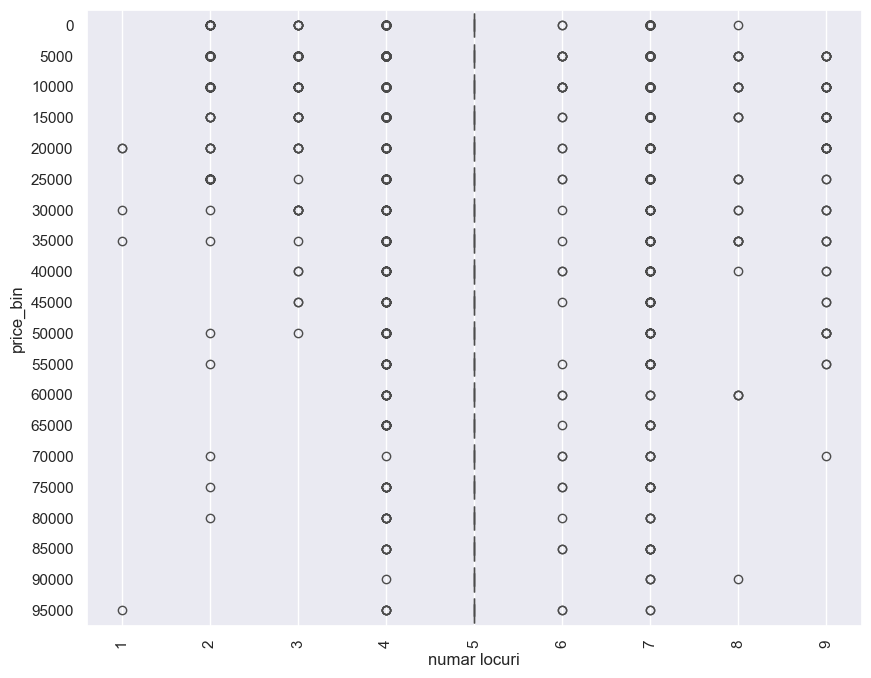

In [17]:
def plot_price_based_on_columns(df):
    # Create a new column for price bins
    print(df['price'].max())
    df['price_bin'] = pd.cut(df['price'], bins=np.arange(0, df['price'].max() + 5000, 5000),
                             labels=np.arange(0, df['price'].max(), 5000))

    columns = ["oferit de", "are vin (serie sasiu)", "combustibil", "transmisie", "norma de poluare", "cutie de viteze",
               "tip caroserie", "numar de portiere", "culoare", "optiuni culoare", "numar locuri"]

    for column in columns:
        plt.figure(figsize=(10, 8))
        sns.boxplot(x=column, y="price_bin", data=df)
        plt.xticks(rotation=90)
        plt.savefig(f"{GRAPHS_PATH}/price_{column}.png")
        plt.show()


plot_price_based_on_columns(df)